## Weighted Probabilities

<br>

### Introduction

In [3]:
from random import choice, sample

print(choice("abcdefghij"))

professions = ["scientist", "philosopher", "engineer", "priest"]
print(choice(professions))

print(choice(("beginner", "intermediate", "advanced")))

# rolling one die
x = choice(range(1, 7))
print("The dice shows: " + str(x))

# rolling two dice:
dice = sample(range(1, 7), 2)
print("The two dice show: " + str(dice))

c
philosopher
advanced
The dice shows: 4
The two dice show: [6, 1]


Like we said before, the chances for the elements of the sequence to be chosen are evenly distributed. So the chances for getting a 'scientist' as a return value of the call choice(professions) is 1/4. This is out of touch with reality. There are surely more scientists and engineers in the world than there are priests and philosophers. Just like with the loaded die, we have again the need of a weighted choice.

We will devise a function "weighted_choice", which returns a random element from a sequence like random.choice, but the elements of the sequence will be weighted. 

<br><br>



<br><br>

### Weighted Random Choices

We will define now the weighted choice function. Let's assume that we have three weights, e.g. 1/5, 1/2, 3/10. We can build the cumulative sum of the weights with np.cumsum(weights).

In [8]:
import numpy as np

weights = [0.2, 0.5, 0.3]
cum_weights = [0] + list(np.cumsum(weights))
print(cum_weights)

[0, 0.20000000000000001, 0.69999999999999996, 1.0]


If we create a random number x between 0 and 1 by using random.random(), the probability for x to lie within the interval [0, cum_weights[0]) is equal to 1/5. The  probability for x to lie within the interval [cum_weights[0], cum_weights[1]) is equal to 1/2 and finally, the probability for x to lie within the interval [cum_weights[1], cum_weights[2]) is 3/10.

Now you are able to understand the basic idea of how weighted_choice operates:

In [4]:
import numpy as np

import random
from random import random 

def weighted_choice(objects, weights):
    """ returns randomly an element from the sequence of 'objects', 
        the likelihood of the objects is weighted according 
        to the sequence of 'weights', i.e. percentages."""

    weights = np.array(weights, dtype=np.float64)
    sum_of_weights = weights.sum()
    # standardization:
    np.multiply(weights, 1 / sum_of_weights, weights)
    weights = weights.cumsum()
    x = random()
    for i in range(len(weights)):
        if x < weights[i]:
            return objects[i]



Example:

We can use the function weighted_choice for the following task:
<br><br>
Suppose, we have a "loaded" die with P(6)=3/12 and P(1)=1/12. The probability for the outcomes of all the other possibilities is equally likely, 
i.e. P(2) = P(3) = P(4) = P(5) = p.
<br><br>
We can calculate p with

1 - P(1) - P(6) = 4 x p

that means

p = 1 / 6

How can we simulate this die with our weighted_choice function?

We call weighted_choice with 'faces_of_die' and the 'weights' list. Each call correspondents to a throw of the loaded die.

We can show that if we throw the die a large number of times, for example 10,000 times, we get roughly the probability values of the weights:


In [6]:
from collections import Counter

faces_of_die = [1, 2, 3, 4, 5, 6]
weights = [1/12, 1/6, 1/6, 1/6, 1/6, 3/12]

outcomes = []
n = 10000
for _ in range(n):
    outcomes.append(weighted_choice(faces_of_die, weights))

c = Counter(outcomes)
for key in c:
    c[key] = c[key] / n
    
print(sorted(c.values()), sum(c.values()))


[0.0832, 0.1601, 0.1614, 0.1665, 0.1694, 0.2594] 1.0


We can also use list of strings with our 'weighted_choice' function.

We define a list of cities and a list with their corresponding populations. The probability of a city to be chosen should be according to their size:

In [19]:
cities = ["Frankfurt", 
          "Stuttgart", 
          "Freiburg", 
          "München", 
          "Zürich",
          "Hamburg"]
populations = [736000, 628000, 228000, 1450000, 409241, 1841179]
total = sum(populations)
weights = [ round(pop / total, 2) for pop in populations]
print(weights)
for i in range(10):
    print(weighted_choice(cities, populations))

[0.14, 0.12, 0.04, 0.27, 0.08, 0.35]
Frankfurt
Hamburg
Stuttgart
Hamburg
Hamburg
Zürich
München
Stuttgart
München
Frankfurt


<br><br>

### Weighted Random Choice with Numpy

To produce a weighted choice of an array like object, we can also use the choice function of the numpy.random package. Actually, you should use functions from well-established module like 'NumPy' instead of reinventing the wheel by writing your own code. In addition the 'choice' function from NumPy can do even more. It generates a random sample from a given 1-D array or array like object like a list, tuple and so on. The function can be called with four parameters:

```
choice(a, size=None, replace=True, p=None)
```

| Parameter  |  Meaning |
|------------|----------|
|a|a 1-dimensional array-like object or an int. If it is an array-like object, the function will return a random sample from the elements. If it is an int,  it behaves as if we called it with np.arange(a)|
|size|This is an optional parameter defining the output shape. If the given shape is, e.g., ```(m, n, k)```, then ```m * n * k``` samples are drawn. The Default is None, in which case a single value will be returned.|
|replace|An optional boolean parameter. It is used to define whether the output sample will be with or without replacements.|
|p|An optional 1-dimensional array-like object, which contains the probabilities associated with each entry in a. If it is not given the sample assumes a uniform distribution over all entries in a.|



We will base our first exercise on the popularity of programming language as stated by the "Tiobe index"<sup>1</sup>: 

In [20]:
from numpy.random import choice

professions = ["scientist", 
               "philosopher", 
               "engineer", 
               "priest", 
               "programmer"]

probabilities = [0.2, 0.05, 0.3, 0.15, 0.3]

choice(professions, p=probabilities)


'programmer'

Let us use the function choice to create a sample from our professions. To get two professions chosen, we set the ```size```parameter to the shape ```(2, )```. In this case multiple occurances are possible. The top ten programming languages in August 2019 were:

| Programming Language | Percentage in August 2019 | Change to August 2018|
|------------|----------|---|
|Java|16.028%|-0.85%|
|C|15.154%|+0.19%|
|Python|10.020%|+3.03%|
|C++|6.057%|-1.41%|
|C#|3.842%|+0.30%|
|Visual|Basic|.NET|3.695%|-1.07%|
|JavaScript|2.258%|-0.15%|
|PHP|2.075%|-0.85%|
|Objective-C|1.690%|+0.33%|
|SQL|1.625%|-0.69%|
|Ruby|1.316%|+0.13%|


In [33]:
programming_languages = ["Java", "C", "Python", "C++"]
weights = np.array([16, 15.2, 10, 6.1])

# normalization
weights /= sum(weights) 
print(weights)

for i in range(10):
    print(choice(programming_languages, p=weights))

[0.33826638 0.32135307 0.21141649 0.12896406]
Java
C++
Python
Python
C
C++
C
C
Python
C


<br><br>

### Weighted Sample

In the previous chapter on random numbers and probability, we introduced the function 'sample' of the module 'random' to randomly extract a population or sample from a group of objects liks lists or tuples. Every object had the same likelikhood to be drawn, i.e. to be part of the sample. 

In real life situation there will be of course situation in which every or some objects will have different probabilities. We will start again by defining a function on our own. This function will use the previously defined 'weighted_choice' function. 

In [41]:
def weighted_sample(population, weights, k):
    """ 
    This function draws a random sample (without repeats) 
    of length k     from the sequence 'population' according 
    to the list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        sample.add(choice)
        index = population.index(choice)
        weights.pop(index)
        population.remove(choice)
        weights = [ x / sum(weights) for x in weights]
    return list(sample)


Example using the sample function:

Let's assume we have eight candies, coloured "red", "green", "blue", "yellow", "black", "white", "pink", and "orange". Our friend Peter will have the "weighted" preference 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24 for thes colours. He is allowed to take 3 candies:

In [42]:
candies = ["red", "green", "blue", "yellow", "black", "white", "pink", "orange"]
weights = [ 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24]
for i in range(10):
    print(weighted_sample(candies, weights, 3))

['green', 'orange', 'pink']
['green', 'orange', 'black']
['yellow', 'black', 'pink']
['red', 'green', 'yellow']
['yellow', 'black', 'pink']
['green', 'orange', 'yellow']
['red', 'blue', 'pink']
['white', 'yellow', 'pink']
['green', 'blue', 'pink']
['orange', 'blue', 'black']


Let's approximate the likelihood for an orange candy to be included in the sample:

In [46]:
n = 100000
orange_counter = 0
for i in range(n):
    if "orange" in weighted_sample(candies, weights, 3):
        orange_counter += 1
        
print(orange_counter / n)

0.71015


It was completely unnecessary to write this function, because we can use the choice function of NumPy for this purpose as well. All we have to do is assign the shape '(2, )' to the optional parameter 'size'. Let us redo the previous example by substituting weighted_sampe with a call of np.random.choice:

In [59]:
n = 100000
orange_counter = 0
for i in range(n):
    if "orange" in np.random.choice(candies, 
                                    p=weights, 
                                    size=(3,),
                                    replace=False):
        orange_counter += 1
        
print(orange_counter / n)

0.71276


In addition, the function 'np.random.choice' gives us the possibility to allow repetitions, as we can see in the following example:

In [64]:
countries = ["Germany", "Switzerland", 
             "Austria", "Netherlands",
             "Belgium", "Poland", 
             "France", "Ireland"]
weights = np.array([83019200, 8555541, 8869537,
                    17338900, 11480534, 38413000, 
                    67022000, 4857000])
weights = weights / sum(weights)

for i in range(4):
    print(np.random.choice(countries,
                           p=weights, 
                           size=(3,),
                           replace=True))

['Germany' 'Belgium' 'France']
['Poland' 'Poland' 'Poland']
['Germany' 'Austria' 'Poland']
['France' 'France' 'France']


<br><br>

### Cartesian Choice

The function cartesian_choice is named after the Cartesian product from set theory

#### Cartesian product

The Cartesian product is an operation which returns a set from multiple sets. The result set from the Cartesian product is called a "product set" or simply the "product". 

For two sets A and B, the Cartesian product A × B is the set of all ordered pairs (a, b) where a ∈ A and b ∈ B:

A x B = { (a, b) | a &isin; A and  b &isin; B }

If we have n sets A<sub>1</sub>,  A<sub>2</sub>, ... A<sub>n</sub>, we can build the Cartesian product correspondingly:

A<sub>1</sub> x A<sub>2</sub> x ... x A<sub>n</sub> = { (a<sub>1</sub>,  a<sub>2</sub>, ... a<sub>n</sub>) | a<sub>1</sub> &isin; A<sub>1</sub>, 
a<sub>2</sub> &isin; A<sub>2</sub>, ... a<sub>n</sub> &isin; A<sub>n</sub>]

The Cartesian product of n sets is sometimes called
an n-fold Cartesian product.


#### Cartesian Choice: cartesian_choice

We will write now a function cartesian_choice, which takes an arbitrary number of iterables as arguments and returns a list, which consists of random choices from each iterator in the respective order.

Mathematically, we can see the result of the function cartesian_choice as an element
of the Cartesian product of the iterables which have been passed as arguments.


In [68]:
import numpy as np

def cartesian_choice(*iterables):
    """
    A list with random choices from each iterable of iterables 
    is being created in respective order.
    
    The result list can be seen as an element of the 
    Cartesian product of the iterables 
    """
    res = []
    for population in iterables:
        res.append(np.random.choice(population))
    return res


cartesian_choice(["The", "A"],
                 ["red", "green", "blue", "yellow", "grey"], 
                 ["car", "house", "fish", "light"],
                 ["smells", "dreams", "blinks", "shines"])


['The', 'green', 'house', 'shines']

We define now a weighted version of the previously defined function:

In [73]:
import numpy as np

def weighted_cartesian_choice(*iterables):
    """
    An arbitrary number of tuple or lists,
    each consisting of population and weights.
    weighted_cartesian_choice returns a list 
    with a chocie from each population
    """
    res = []
    for population, weights in iterables:
        # normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.2, 0.1])

print("It may or may not be true:")
for i in range(10):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    print(" ".join(res) + ".")


It may or may not be true:
A grey light smells of happiness.
The green water smells of happiness.
A blue water smells of air.
The green elephant dreams of happiness.
A yellow fish smells of happiness.
The grey elephant dreams of air.
No grey programming language dreams of air.
Every blue elephant smells of happiness.
A blue light smells of air.
The grey programming language dreams of happiness.


We check in the following version, if the "probabilities" are all right:

In [22]:
import random

def weighted_cartesian_choice(*iterables):
    """
    A list with weighted random choices from each iterable of iterables 
    is being created in respective order
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.2, 0.1])

print("It may or may not be true:")
sentences = []
for i in range(10000):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    sentences.append(" ".join(res) + ".")

words = ["smells", "dreams", "thinks", "is made of"]
from collections import Counter
c = Counter()
for sentence in sentences:
    for word in words:
        if word in sentence:
            c[word] += 1
  
wsum = sum(c.values())
for key in c:
    print(key, c[key] / wsum)




It may or may not be true:
thinks 0.2015
is made of 0.1039
smells 0.4016
dreams 0.293


<br><br>

### Random Seed



A random seed, - also called "seed state", or just "seed" - is a number used to initialize a pseudorandom number generator. When we called random.random() we expected and got a random number between 0 and 1. random.random() calculates a new random number by using the previously produced random number. What about the first time we use random in our program? Yes, there is no previously created random number. If a random number generator is called for the first time, it will have to create a first "random" number.  

If we seed a pseudo-random number generator, we provide a first "previous" value. A seed value  corresponds to a sequence of generated values for a given random number generator. If you use the same seed value again, you get and you can rely on getting the same sequence of numbers again.


The seed number itself doesn't need to be randomly chosen so that the algorithm creates values which follow a probability distribution in a pseudorandom manner. Yet, the seed matters in terms of security. If you know the seed, you could for example generate the secret encryption key which is based on this seed.

Random seeds are in many programming languages generated from the state of the computer system, which is in lots of cases the system time.

This is true for Python as well. Help on random.seed says that if you call the function with None or no argument it will seed "from current time or from an operating system specific randomness source if available."

In [23]:
import random

help(random.seed)

Help on method seed in module random:

seed(a=None, version=2) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    For version 2 (the default), all of the bits are used if *a* is a str,
    bytes, or bytearray.  For version 1, the hash() of *a* is used instead.
    
    If *a* is an int, all bits are used.



The seed functions allows you to get a determined sequence of random numbers. You can repeat this sequence, whenever you need it again, e.g. for debugging purposes.

In [24]:
import random

random.seed(42)

for _ in range(10):
    print(random.randint(1, 10), end=", ")
    
print("\nLet's create the same random numbers again:")
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10), end=", ")


2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 
Let's create the same random numbers again:
2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 

<br><br>

### Random Numbers in Python with Gaussian and Normalvariate Distribution

We want to create now 1000 random numbers between 130 and 230 that have a gaussian distribution with the mean value mu set to 550 and the standard deviation sigma is set to 30. 

In [25]:
from random import gauss

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = gauss(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
        
print(values[:10])

[173.49123947564414, 183.47654360102564, 186.96893210720162, 214.90676059797428, 199.69909520396007, 183.31521532331496, 157.85035192965537, 149.56012897536849, 187.39026585633607, 219.33242481612143]


The following program plots the random values, which we have created before. We haven't covered matplotlib so far, so it's not necessary to understand the code:

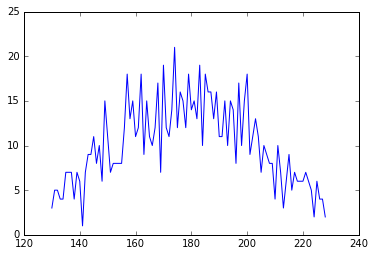

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))

We do the same now with normvariate instead of gauss:

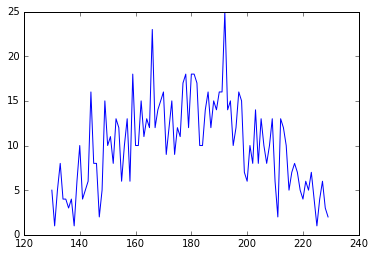

In [27]:
from random import normalvariate

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = normalvariate(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))

<br><br>

### Exercise With Zeros and Ones

It might be a good idea to write the following function as an exercise yourself.  The function should be called with a parameter p, which is a probabilty value between 0 and 1. The function returns a 1 with a probability of p, i.e. ones in p percent and zeros in (1 - p) percent of the calls:

In [28]:
import random

def random_ones_and_zeros(p):
    """ p: probability 0 <= p <= 1
        returns a 1 with the probability p
    """
    x = random.random()
    if x < p:
        return 1
    else:
        return 0
    

Let's test our little function:

In [29]:
n = 1000000
sum(random_ones_and_zeros(0.8) for i in range(n)) / n

0.800609

It might be a great idea to implement a task like this with a generator. If you are not familar with the way of working of a Python generator, we recommend to consult our [chapter on generators and iterators](python3_generators.php) of our Python tutorial.

In [30]:
import random

def random_ones_and_zeros(p):
    while True:
        x = random.random()
        yield 1 if x < p else 0
        
def firstn(generator, n):
	for i in range(n):
		yield next(generator)

In [31]:
n = 1000000
sum(x for x in firstn(random_ones_and_zeros(0.8), n)) / n

0.799762

Our generator random_ones_and_zeros can be seen as a sender, which emits ones and zeros with a probability of p and (1-p) respectively. 

We will write now another generator, which is receiving this bitstream. The task of this new generator is to read the incoming bitstream and yield another bitstream with ones and zeros with a probability of 0.5 without knowing or using the probability p. It should work for an arbitrary probability value p.<sup>2</sup>

In [32]:
def ebitter(bitstream):
    while True:
        bit1 = next(bitstream)
        bit2 = next(bitstream)
        if bit1 + bit2 == 1:
            bit3 = next(bitstream)
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        

In [33]:
def ebitter2(bitstream):
    bit1 = next(bitstream)
    bit2 = next(bitstream)
    bit3 = next(bitstream)
    while True:
        if bit1 + bit2 == 1:
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        bit1, bit2, bit3 = bit2, bit3, next(bitstream)

In [34]:
n = 1000000
sum(x for x in firstn(ebitter(random_ones_and_zeros(0.8)), n)) / n

0.49975

In [35]:
n = 1000000
sum(x for x in firstn(ebitter2(random_ones_and_zeros(0.8)), n)) / n

0.500011

**Underlying theory:**

Our first generator emits a bitstream B<sub>0</sub>, B<sub>1</sub>, B<sub>2</sub>,...  

We check now an arbitrary pair of consecutive Bits B<sub>i</sub>, B<sub>i+1</sub>, ...

Such a pair can have the values 01, 10, 00 or 11. The probability P(01) = (p-1) x p and probability P(10) = p x (p-1), so that the combined probabilty that the two consecutive bits are either 01 or 10 (or the sum of the two bits is 1)  is 2 x (p-1) x p 

Now we look at another bit B<sub>i+2</sub>. What is the probability that both 

B<sub>i</sub> + B<sub>i+1</sub> = 1

and 

B<sub>i+1</sub> + B<sub>i+2</sub> = 1?

The possible outcomes satisfying these conditions and their corresponding probabilities can be found in the following table:

<br>

<table border="1">
  <tr>
    <th>Probability</th>
    <th>B<sub>i</sub></th>
    <th>B<sub>i+1</sub></th>
    <th>B<sub>i+2</sub></th>
  </tr>
  <tr>
    <td>p<sup>2</sup> x (1-p)</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>p x (1 - p)<sup>2</sup></td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
</table>

<br>

We will denote the outcome sum(B<sub>i</sub>, B<sub>i+1</sub>)=1 asX<sub>1</sub> and correspondingly the outcome sum(B<sub>i+1</sub>, B<sub>i+2</sub>)=1 as X<sub>2</sub> 

So, the joint probability P(X<sub>1</sub>, X<sub>2</sub>) = p<sup>2</sup> x (1-p) + p x (1 - p)<sup>2</sup> which can be rearranged to p x (1-p)

The conditional probability of X<sub>2</sub> given X<sub>1</sub>:

P(X<sub>2</sub> | X<sub>1</sub>) = P(X<sub>1</sub>, X<sub>2</sub>) / P(X<sub>2</sub>)

P(X<sub>2</sub> | X<sub>1</sub>) =  p x (1-p)  /  2 x p x (1-p) = 1 / 2

<br><br>

### Synthetical Sales Figures

In this subchapter we want to create a data file with sales figures. Imagine that we have a chain of shops in various European and Canadian cities: Frankfurt, Munich, Berlin, Zurich, Hamburg, London, Toronto, Strasbourg, Luxembourg, Amsterdam, Rotterdam, The Hague

We start with an array 'sales' of sales figures for the year 1997:


In [36]:
import numpy as np

sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])

 The aim is to create a comma separated list like the ones you get from Excel. The file should contain the sales figures, we don't know, for all the shops, we don't have, spanning the year from 1997 to 2016.

We will add random values to our sales figures year after year. For this purpose we construct an array with growthrates. The growthrates can vary between a minimal percent value (min_percent) and maximum percent value (max_percent):

In [37]:
min_percent = 0.98  # corresponds to -1.5 %
max_percent = 1.06   # 6 %
growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
print(growthrates)

[ 1.03476561  1.00885095  1.00614899  1.05164581  1.0307091   0.98822763
  0.99366872  1.05810125  1.04798573  1.02784796  1.05035899  1.02262023]


To get the new sales figures after a year, we multiply the sales array "sales" with the array "growthrates":

In [38]:
sales * growthrates

array([ 1289.20412146,  2239.649113  ,  1645.82833205,  2036.24919608,
        1032.80143634,  2074.41825668,   719.40621318,  1047.91173209,
         567.42139317,  1814.15165757,  1893.62920988,  2044.21783979])

To get a more sustainable sales development, we change the growthrates only every four years.

This is our complete program, which saves the data in a file called sales_figures.csv:

In [39]:
import numpy as np
fh = open("sales_figures.csv", "w")

fh.write("Year, Frankfurt, Munich, Berlin, Zurich, Hamburg, London, Toronto, Strasbourg, Luxembourg, Amsterdam, Rotterdam, The Hague\n")
sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])

for year in range(1997, 2016):
    line = str(year) + ", " + ", ".join(map(str, sales))
    fh.write(line + "\n")
    if year % 4 == 0:
         min_percent = 0.98  # corresponds to -1.5 %
         max_percent = 1.06   # 6 %
         growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
         #growthrates = 1 + (np.random.rand(12) * max_percent - negative_max) / 100
    sales = np.around(sales * growthrates, 2)
fh.close()

The result is in the file [sales_figures.csv](sales_figures.csv).

We will use this file in our chapter on reading and writing in Numpy.

<br><br>

### Exercises

<ol>
<li>Let's do some more die rolling. Prove empirically - by writing a simulation program - that the probability for the combined events "an even number is rolled" (E) and "A number greater than 2 is rolled" is 1/3.
<li>The file ["universities_uk.txt"](universities_uk.txt) contains a list of universities in the United Kingdom by enrollment from 2013-2014 (data from  ([Wikepedia](https://en.wikipedia.org/wiki/List_of_universities_in_the_United_Kingdom_by_enrollment#cite_note-1)). 
Write a function which returns a tuple 
(universities, enrollments, total_number_of_students)

with

- universities: list of University names
- enrollments: corresponding list with enrollments
- total_number_of_students: over all universities

Now you can enroll a 100,000 fictional students with a likelihood corresponding to the real enrollments.
</li>

<li>






Let me take you back in time and space in our next exercise. We will travel back into ancient Pythonia (Πηθωνια). It was the time when king Pysseus ruled as the benevolent dictator for live.
It was the time when Pysseus sent out his messengers throughout the world to announce that the time has come for his princes Anacondos (Ανακονδος), Cobrion (Κομπριον), Boatos (Μποατος) and Addokles (Ανδοκλης) to merry. So, they organized the toughest programming contests amongst the fair and brave amazons, better known as Pythonistas of Pythonia. Finally, only eleven amazons were left to choose from:


1) The ethereal Airla (Αιρλα)
2) Barbara (Βαρβάρα), the one from a foreign country.
3) Eos (Ηως), looking divine in dawn
4) The sweet Glykeria (Γλυκερία)
5) The gracefull Hanna (Αννα)
6) Helen (Ελενη), the light in the dark
7) The good angel Agathangelos (Αγαθάγγελος)
8) the violet tinted cloud Iokaste (Ιοκάστη)
9) Medousa (Μέδουσα), the guardian
10) the self-controlled Sofronia (Σωφρονία)
11) Andromeda (Ανδρομεδα), the one who thinks man or a warrior.

On the day they arrived the chances to be drawn in the lottery are the same for every amazon, but Pysseus wants the lottery to be postponed to some day in the future. The probability changes every day: It will be lowered by 1/13 for the first seven amazones and it will be increased by 1/12 for the last four amazones. 

How long will the king have to wait until he can be more than 90 percent sure that his princes Anacondos, Cobrion, Boatos and Addokles will be married to Iokaste, Medousa, Sofronia and Andromeda?






</li>

</ol>

<br><br>

### Solutions to our exercises

<ol>
<li>

In [40]:
from random import randint

outcomes = [ randint(1, 6) for _ in range(10000)]

even_pips = [ x for x in outcomes if x % 2 == 0]
greater_two = [ x for x in outcomes if x > 2]

combined = [ x for x in outcomes if x % 2 == 0 and x > 2]

print(len(even_pips) / len(outcomes))
print(len(greater_two) / len(outcomes))
print(len(combined) / len(outcomes))


0.5061
0.6719
0.3402


<li>

At first we will write the function "process_datafile" to process our data file:


In [41]:
def process_datafile(filename):
    """ process_datafile -> (universities, 
                             enrollments, 
                             total_number_of_students) 
        universities: list of University names
        enrollments: corresponding list with enrollments
        total_number_of_students: over all universities
    """

    universities = []
    enrollments = []
    with open(filename) as fh:
        total_number_of_students = 0
        fh.readline() # get rid of descriptive first line
        for line in fh:
             line = line.strip()
             *praefix, undergraduates, postgraduates, total = line.rsplit()
             university = praefix[1:]
             total = int(total.replace(",", ""))
             enrollments.append(total)
             universities.append(" ".join(university))
             total_number_of_students += total
    return (universities, enrollments, total_number_of_students)

Let's start our function and check the results:

In [42]:
universities, enrollments, total_students = process_datafile("universities_uk.txt")

for i in range(14):
    print(universities[i], end=": ")
    print(enrollments[i])
print("Total number of students onrolled in the UK: ", total_students)

Open University in England: 123490
University of Manchester: 37925
University of Nottingham: 33270
Sheffield Hallam University: 33100
University of Birmingham: 32335
Manchester Metropolitan University: 32160
University of Leeds: 30975
Cardiff University: 30180
University of South Wales: 29195
University College London: 28430
King's College London: 27645
University of Edinburgh: 27625
Northumbria University: 27565
University of Glasgow: 27390
Total number of students onrolled in the UK:  2299380


We want to enroll now a virtual student randomly to one of the universities. To get a weighted list suitable for our weighted_choice function, we have to normalize the values in the list enrollments:

In [43]:
normalized_enrollments = [ students / total_students for students in enrollments]

# enrolling a virtual student:
print(weighted_choice(universities, normalized_enrollments))

University of Dundee


We have been asked by the exercise to "enroll" 100,000 fictional students. This can be easily accomplished with a loop:

In [44]:
from collections import Counter

outcomes = []
n = 100000
for i in range(n):
    outcomes.append(weighted_choice(universities, normalized_enrollments))

c = Counter(outcomes)
    
print(c.most_common(20))

[('Open University in England', 5529), ('University of Manchester', 1574), ('University of Nottingham', 1427), ('University of Birmingham', 1424), ('Sheffield Hallam University', 1410), ('Manchester Metropolitan University', 1408), ('Cardiff University', 1334), ('University of Leeds', 1312), ('University of South Wales', 1264), ('University of Plymouth', 1218), ('University College London', 1209), ('Coventry University', 1209), ('University of the West of England', 1197), ('University of Edinburgh', 1196), ("King's College London", 1183), ('University of Glasgow', 1181), ('University of Central Lancashire', 1176), ('Nottingham Trent University', 1174), ('University of Sheffield', 1160), ('Northumbria University', 1154)]



</li>

<li>


The bunch of amazons is implemented as a list, while we choose a set for Pysseusses favorites. The weights at the beginning are 1/11 for all, i.e. 1/len(amazons).

Every loop cycle corresponds to a new day. Every time we start a new loop cycle, we will draw "n" samples of Pythonistas to calculate the   ratio of the number of times the sample is equal to the king's favorites divided by the number of times the sample doesn't match the king's idea of daughter-in-laws. This corresponds to the probability "prob". We stop the first time, the probability is equal or larger than 0.9.

We can use both the function "weighted_same" and "weighted_sample_alternative" to do the drawing. 

In [45]:
import time

amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = [ 1/len(amazons) for _ in range(len(amazons)) ]

Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}
n = 1000
counter = 0

prob = 1 / 330
days = 0
factor1 = 1 / 13
factor2 = 1 / 12

start = time.clock()
while prob < 0.9:
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, weights, 4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = counter / n
    counter = 0
    weights[:7] = [ p - p*factor1 for p in weights[:7] ]
    weights[7:] = [ p + p*factor2 for p in weights[7:] ]
    weights = [ x / sum(weights) for x in weights]
    days += 1
print(time.clock() - start)

print("Number of days, he has to wait: ", days)


2.870792999999999
Number of days, he has to wait:  33


Teh value for the number of days differs, if n is not large enough.

The following is a solutions without round-off errors. We will use Fraction from the module fractions.

In [46]:
import time
from fractions import Fraction


amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = [ Fraction(1, 11) for _ in range(len(amazons)) ]

Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}
n = 1000
counter = 0

prob = Fraction(1, 330)
days = 0
factor1 = Fraction(1, 13)
factor2 = Fraction(1, 12)

start = time.clock()
while prob < 0.9:
    #print(prob)
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, weights, 4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = Fraction(counter, n)
    counter = 0
    weights[:7] = [ p - p*factor1 for p in weights[:7] ]
    weights[7:] = [ p + p*factor2 for p in weights[7:] ]
    weights = [ x / sum(weights) for x in weights]
    days += 1
print(time.clock() - start)

print("Number of days, he has to wait: ", days)

35.920345
Number of days, he has to wait:  33


We can see that the solution with fractions is beautiful but very slow. Whereas the greater precision doesn't play a role in our case.

So far, we haven't used the power of Numpy. We will do this in the next implementation of our problem:

In [47]:
import time
import numpy as np

amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = np.full(11, 1/len(amazons))


Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}


n = 1000
counter = 0

prob = 1 / 330
days = 0
factor1 = 1 / 13
factor2 = 1 / 12

start = time.clock()
while prob < 0.9:
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, weights, 4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = counter / n
    counter = 0
    weights[:7] = weights[:7] - weights[:7] * factor1
    weights[7:] = weights[7:] + weights[7:] * factor2
    weights = weights / np.sum(weights)
    #print(weights)
    days += 1
print(time.clock() - start)

print("Number of days, he has to wait: ", days)

4.930090000000007
Number of days, he has to wait:  33


<br><br>
<hr>
<br>


### Footnotes:

<br>
<sup>1</sup> The [TIOBE index](https://www.tiobe.com/tiobe-index/) or The TIOBE Programming Community index is - according to the website "an indicator of the popularity of programming languages. The index is updated once a month. The ratings are based on the number of skilled engineers world-wide, courses and third party vendors. Popular search engines such as Google, Bing, Yahoo!, Wikipedia, Amazon, YouTube and Baidu are used to calculate the ratings. It is important to note that the TIOBE index is not about the best programming language or the language in which most lines of code have been written."
<br><br>
<sup>2</sup>  I am thankful to Dr. Hanno Baehr who introduced me to the problem of "Random extraction" when participating in a Python training course in Nuremberg in January 2014. Hanno outlined some bits of the theoretical framework. During a night session in a pub called "Zeit & Raum" (english: "Time & Space") I implemented a corresponding Python program to back the theoretical solution empirically.
